In [304]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [305]:
import pandas as pd
import re

# ===== 讀取 Excel =====
excel_file_path = '/content/drive/MyDrive/生醫智慧工程/train_Data.xlsx'
df = pd.read_excel(excel_file_path)

In [306]:
df.head()

,ID,label,content_cleaned
0,1,0,葉黃素、益生菌、魚油、蔓越莓錠。你需要的保健品️日本味王全部都有。家裡備著日本味王保健品。好...
1,2,1,海底椰是一種夏季常見的湯料以清燥熱、止咳功效顯著而聞名且具有滋陰補腎、潤肺養顏、強壯身體機能...
2,3,0,杏輝活芯升級版。健康從芯開始。一整天的會議轟炸感覺精神不濟、提不起勁只想癱在床上。趕公車、爬...
3,4,1,淨亮效果AAA擊退暗沉更快速亮澤肌防護AAA光澤AAA。你是否擁有以下肌膚問題:肌膚蠟黃暗沉...
4,5,0,醫學實證000有感排便順暢。保證投入菌數高達000億。益生菌AAA益生元AAA後生元。調整體...


In [307]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['content_cleaned']
y = df['label']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=100,  # 100 samples for the test set
    stratify=y,     # Stratify based on the 'label' column
    random_state=42 # for reproducibility
)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nDistribution of labels in y_train:")
display(y_train.value_counts())

print("\nDistribution of labels in y_test:")
display(y_test.value_counts())

Shape of X_train: (1442,)
Shape of X_test: (100,)
Shape of y_train: (1442,)
Shape of y_test: (100,)

Distribution of labels in y_train:


,count
label,
1,721
0,721



Distribution of labels in y_test:


,count
label,
0,50
1,50


上面程式碼用來分開資料集>>分為train跟test資料集

In [308]:
# Install Jieba for Chinese word segmentation
!pip install jieba

下系統指令安裝某某某套件(可改)

In [309]:
import jieba

def segment_text(text):
    if isinstance(text, str):
        # Perform word segmentation
        seg_list = jieba.cut(text, cut_all=False) # cut_all=False for accurate mode
        return " ".join(seg_list)
    else:
        return ""

# Apply word segmentation to the cleaned content in both training and testing sets
X_train_segmented = X_train.apply(segment_text)
X_test_segmented = X_test.apply(segment_text)

print("Original X_train sample:")
display(X_train.head())

print("\nSegmented X_train sample:")
display(X_train_segmented.head())

print("\nOriginal X_test sample:")
display(X_test.head())

print("\nSegmented X_test sample:")
display(X_test_segmented.head())

Original X_train sample:


,content_cleaned
895,打破年齡設限‧看見青春立體。0AAA。撐補成分歲月細節一股腦地顯現在外表。支‧撐‧力000A...
187,兒童專科舒緩情緒消化提升敏感調理全台最足量健康食品變聰明變聰明的零食天然增加學習效率針對敏弱...
1440,0%增稠000%香料000%色素。維持消化道機能。日本專利膳食纖維多元益生菌。黃金比例口感細...
601,小胸救星升AAA不難。小胸&大胸女孩是不是有以下煩惱。撐不起衣服。哺乳後ㄋㄋ大縮水。美型拉提...
69,便秘救星、減肥聖品、減肥瘦瘦水、便祕必喝、便祕必喝、被封是減肥&解便秘聖品、便祕必喝、減肥聖...



Segmented X_train sample:


,content_cleaned
895,打破 年齡 設限 ‧ 看見 青春 立體 。 0AAA 。 撐補 成分 歲 月 細節 一股 腦...
187,兒童 專科 舒緩 情緒 消化 提升 敏感 調理 全台 最 足量 健康 食品 變聰明 變聰明 ...
1440,0% 增稠 000% 香料 000% 色素 。 維持 消化道 機能 。 日本 專利 膳食 纖...
601,小胸 救星 升 AAA 不難 。 小胸 & 大胸 女孩 是不是 有 以下 煩惱 。 撐 不起...
69,便秘 救星 、 減肥 聖品 、 減 肥瘦 瘦水 、 便 祕 必 喝 、 便 祕 必 喝 、 ...



Original X_test sample:


,content_cleaned
1078,享受尚好生活。享食尚健字號甘甘好活力加值組黃金組合甘甘好膠囊衛部健食字第AAA000號專為您...
1318,超模之鑰。防溢方案。官網000下殺000典悅生醫AAA搭配營養素幫助調節生理機能維持身體健康...
1348,商品。0益生菌益生質互利共生。0項全球專利後生元調整體質。幫助維持消化道機能。0色素、0人工...
89,抗藍光護眼軟糖。不如就給他吃抗藍光軟糖吧。吸收強光、過濾藍光、保護眼睛。適合族群:長時間盯著...
718,體力、美力一次擁有。0種AAA群完整組合。0合000美妍配方讓妳青春好自信。長效緩釋持續釋放...



Segmented X_test sample:


,content_cleaned
1078,享受 尚好 生活 。 享食 尚健字號 甘甘好 活力 加值 組黃金 組合 甘甘好 膠囊 衛部 ...
1318,超模 之 鑰 。 防溢 方案 。 官網 000 下 殺 000 典悅 生醫 AAA 搭配 營...
1348,商品 。 0 益生菌 益生質 互利 共生 。 0 項 全球 專利後生 元 調整 體質 。 幫...
89,抗藍光護 眼軟 糖 。 不如 就給 他 吃 抗藍光 軟糖 吧 。 吸收 強光 、 過濾 藍光...
718,體力 、 美力 一次 擁有 。 0 種 AAA 群 完整 組合 。 0 合 000 美妍 配...


jieba套件執行>將文字裁剪並進行特徵擷取

In [310]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


In [311]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the MLP model
model = Sequential([
    # Explicitly define the input shape based on the number of features in X_train_bow
    Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)),
    Dropout(0.5), # Add a dropout layer to prevent overfitting
    Dense(64, activation='relu'), # Add another hidden layer
    Dropout(0.5), # Add another dropout layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 128)            │       664,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 672,897 (2.57 MB)

 Trainable params: 672,897 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [312]:
# Train the model
# Convert y_train and y_test to numerical dtype
y_train_numerical = y_train.astype(int)
y_test_numerical = y_test.astype(int)

# Convert sparse matrix to dense for Keras Dense layer compatibility
X_train_bow_dense = X_train_bow.todense()


history = model.fit(X_train_bow_dense, y_train_numerical, # Use dense input for training
                    epochs=15, # Number of training epochs
                    shuffle=False,
                    batch_size=500, # Batch size
                    validation_split=0.3) # Use 30% of training data for validation

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 413ms/step - accuracy: 0.5331 - loss: 0.6801 - val_accuracy: 0.8083 - val_loss: 0.6154
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 197ms/step - accuracy: 0.7033 - loss: 0.6124 - val_accuracy: 0.8707 - val_loss: 0.5570
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.8171 - loss: 0.5499 - val_accuracy: 0.9192 - val_loss: 0.4981
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - accuracy: 0.8788 - loss: 0.4902 - val_accuracy: 0.9400 - val_loss: 0.4398
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.9293 - loss: 0.4296 - val_accuracy: 0.9584 - val_loss: 0.3845
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - accuracy: 0.9348 - loss: 0.3791 - val_accuracy: 0.9677 - val_loss: 0.3325
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9617 - loss: 0.3281 - val_accuracy: 0.9746 - val_loss: 0.2853
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step - accuracy: 0.9716 - loss: 0.2795 - val_accuracy: 0.9746 - val_loss:

In [313]:
# Evaluate the model on the test set
# Convert y_test to numerical dtype if it hasn't been already
y_test_numerical = y_test.astype(int)

# Convert sparse test matrix to dense for evaluation
X_test_bow_dense = X_test_bow.todense()


loss, accuracy = model.evaluate(X_test_bow_dense, y_test_numerical) # Use dense input for evaluation

print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9753 - loss: 0.0881 

Test Loss: 0.0862
Test Accuracy: 0.9800


In [314]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)

Shape of X_train_bow: (1442, 5191)


In [315]:
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Initialize CountVectorizer with min_df=2 to only include terms that appear at least twice
vectorizer = CountVectorizer(min_df=2)

# Learn the vocabulary and transform the training data
X_train_bow = vectorizer.fit_transform(X_train_segmented)

# Transform the testing data using the learned vocabulary
X_test_bow = vectorizer.transform(X_test_segmented)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

# Define the MLP model
model = Sequential([
    # Explicitly define the input shape based on the number of features in X_train_bow
    Dense(128, activation='relu', input_shape=(X_train_bow.shape[1],)),
    Dropout(0.5), # Add a dropout layer to prevent overfitting
    Dense(64, activation='relu'), # Add another hidden layer
    Dropout(0.5), # Add another dropout layer
    Dense(1, activation='sigmoid') # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy', # Binary crossentropy for binary classification
              metrics=['accuracy']) # Monitor accuracy

# Print the model summary
model.summary()

Shape of X_train_bow: (1442, 5191)
Shape of X_test_bow: (100, 5191)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_81 (Dense)                │ (None, 128)            │       664,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 672,897 (2.57 MB)

 Trainable params: 672,897 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4960 - loss: 0.6738 

Test Loss: 0.6708
Test Accuracy: 0.4900


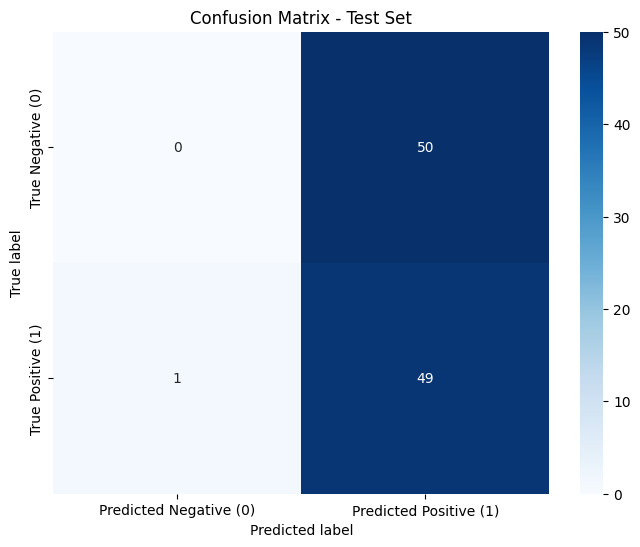

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.49      0.98      0.66        50

    accuracy                           0.49       100
   macro avg       0.25      0.49      0.33       100
weighted avg       0.25      0.49      0.33       100


[True Positive]
Text: 遠離學校病菌大流行打造寶貝安心體質。活化體內防護軍快速抵禦壞菌。維安升級護、安全感。體內好菌身體敏感未到率。這些特殊時刻校園非常時期寒流來襲日夜溫差敏感源一堆身體敏感。全球非常時期超強守護罩增加前線保衛小衛兵。臨床實證狀況天數大幅縮短為000。天。服用。圖表。調節生理機能。0%。臨床實證幫助調整體質上升。天安全下莊強大保護罩盾牌有效降低。小孩服用以降低敏感。防護班上好多同學沒去學校。防護罩換季時。
True Label: 1
Pred Label: 1

[False Negative]
Text: A是AAA胺基丁酸的縮寫屬於神經傳導物質可活化副交感神經達到舒緩放鬆。舒眠膠囊其他優勢減緩壓力、平衡焦慮情緒、促進抗氧化、舒緩腸胃不適。
True Label: 1
Pred Label: 0

[False Positive]
Text: 專屬男性營養配方。德國高規格維生素強化。一錠補給能量滿檔。健康均衡活力全方位。男性綜合維他命簡介。根據國民營養調查指出:台灣男性蔬果類及堅果種子攝取量偏低。成年男性各年齡層皆未達000%建議量。缺乏維生素及礦物質的天然來源長期下來造成的不均衡很可能影響健康維持。《高效營養補充一錠補足男性一日所需》。健康滋補。德國頂規綜合維生素。專業精準計量含完整000種維生素。強化作用。專利黑胡椒萃取。含有純度000%胡椒鹼促進營養素吸收率。男性元素。甘胺酸鋅。0AAA足量添加易於人體吸收。天然營養。愛爾蘭海藻鈣。獲

In [316]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ensure X_test_bow is a dense array and y_test is numerical
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

# Predict probabilities and get class predictions
y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_dense, y_test_numerical)
print(f"\nTest Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

# Generate and print the classification report
report = classification_report(y_test_numerical, y_pred)
print("Classification Report:")
print(report)

# Generate and print examples
results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])

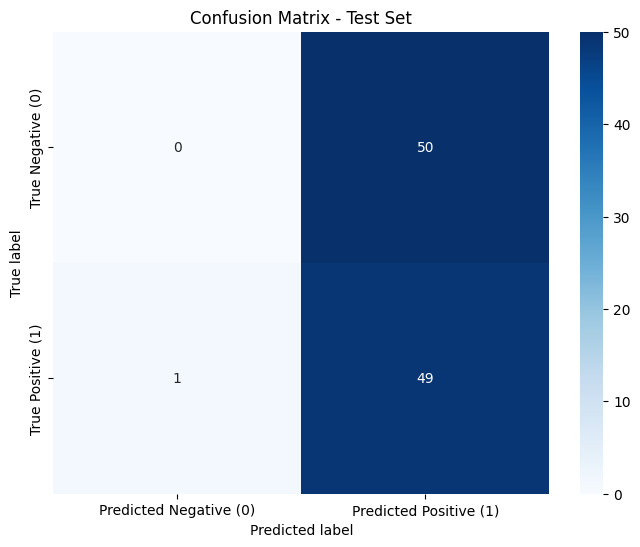

In [317]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test_numerical, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'],
            yticklabels=['True Negative (0)', 'True Positive (1)'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix - Test Set')
plt.show()

In [318]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(y_test_numerical, y_pred)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.49      0.98      0.66        50

    accuracy                           0.49       100
   macro avg       0.25      0.49      0.33       100
weighted avg       0.25      0.49      0.33       100



In [319]:
import numpy as np
X_test_dense = X_test_bow.toarray()
y_test_numerical = y_test.astype(int).values

y_pred_prob = model.predict(X_test_dense)
y_pred = (y_pred_prob >= 0.5).astype(int).flatten()

results = pd.DataFrame({
    "text": X_test,
    "true": y_test_numerical,
    "pred": y_pred
})

tn = results[(results.true == 0) & (results.pred == 0)]
tp = results[(results.true == 1) & (results.pred == 1)]
fn = results[(results.true == 1) & (results.pred == 0)]
fp = results[(results.true == 0) & (results.pred == 1)]

examples = []
if len(tn) > 0: examples.append(("True Negative", tn.sample(1)))
if len(tp) > 0: examples.append(("True Positive", tp.sample(1)))
if len(fn) > 0: examples.append(("False Negative", fn.sample(1)))
if len(fp) > 0: examples.append(("False Positive", fp.sample(1)))

if len(examples) < 5:
    more_samples = results.sample(5 - len(examples))
    for _, row in more_samples.iterrows():
        examples.append(("Random", row.to_frame().T))

for label, row in examples:
    print(f"\n[{label}]")
    print("Text:", row["text"].values[0])
    print("True Label:", row["true"].values[0])
    print("Pred Label:", row["pred"].values[0])


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

[True Positive]
Text: 清體調節膚況。裡外外的廢物AAA。清體內外清體把廢物都丟掉。貪杯有排出廢物需求淨化有效保護排AAA系統。提升基礎AAA謝率天天自然淨化。面容焦慮體味癮君子空氣汙染女神週不適時常應酬曾使用類固醇長期使用西藥如廁難安。邁向窈窕輕盈去廢物、輕盈清除廢物廢物清除身體負擔減輕。清體改善經前AAA狀改善我的AAA體不適。
True Label: 1
Pred Label: 1

[False Negative]
Text: A是AAA胺基丁酸的縮寫屬於神經傳導物質可活化副交感神經達到舒緩放鬆。舒眠膠囊其他優勢減緩壓力、平衡焦慮情緒、促進抗氧化、舒緩腸胃不適。
True Label: 1
Pred Label: 0

[False Positive]
Text: 社畜咖啡AAA若伸維天然玫瑰果粉。提升青春行動力、社畜咖啡AAA玫悅生玫瑰果粉給您紅潤AAA彈好氣色含豐富營養素有助於調節生理機能提升活力讓您擁有青春行動力展現紅潤AAA彈好氣色讓您每天都充滿活力。
True Label: 0
Pred Label: 1

[Random]
Text: A加葡萄糖胺、微分子膠原蛋白AAA、高濃縮螯合鈣、全效型頂級魚油、高濃度維生素AAA群是您健康的最佳選擇。我們的產品結合了多種營養素幫助您維持良好的身體狀態。讓您輕鬆調節生理機能幫助消化道機能提升整體健康水平。讓健康從飲食開始從現在開始享受更健康的生活。
True Label: 0
Pred Label: 1

[Random]
Text: 甩肉。我想變瘦。健康瘦。不瘦胸。燃脂組合。想瘦。瘦身要持之以恆。瘦小金。可直接結合毒素促進毒素排泄。清除解毒過程中產生的大量自由基避免細胞受損。減肥。超強燃脂組合。在預防自由基危害人體造成老化機制上有很強的功效。還會刺激心臟和末梢血管擴張使血液循環加速。幫助身體排汗、利尿消腫。燃燒脂肪。排尿也會增加體內毒素順利被排出體外。油切力。解酒。確診。喉嚨爆痛。都跟肝臟排毒息息相關。有助於維持生長發育與生殖機能。有助於皮膚組織蛋白質的合成。確診期間我真的每天吃排毒。白天一顆保肝。我很在意之前受傷的疤痕。疤痕淡很多。地中海型貧血。膝蓋劃一條傷口和瘀青。痘超煩人。變白。好肌膚。悶著肌膚和你的毛孔